Projet : outil d'estimation des prix de l'immobiliers

Objectif : 
- Être en mesure de déterminer le prix d'un bien immobilier en se basant sur des éléments caractérisant le bien. Nous nous baserons sur un jeux de données contenant les prix des biens immobiliers aux États-Unies. 

- Ce projet de Machine Learning permettra de prédire avec précision le prix d'un bien afin de réduire au maximum les erreurs de détermination que peut commettre un agent immobilier.

  1.   Target : price
  2.   Features : **bedrooms**, **bathrooms**, **sqft_living**, **above**, **basement** and **lot**, **floors**, **waterfront**,**view**, **condition**, **building** **year** and **renovation**, street (?), **city**


## I - Import des librairies et du jeu de données

In [1]:
import pandas as pd 
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

In [2]:
df = pd.read_csv('/Users/obelmouzouna/Downloads/data.csv', sep =',')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## II - Analyses préliminaires (Uni et Bi-variées)

### 1- Analyse de la qualité et de la complétude des données

In [3]:
df.shape

(4600, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

👉🏼 Le jeu de données est complet, les 18 colonnes ne comportent aucune valeur nulle sur les 4600 lignes et les types de données semblent être correctes. Néanmoins, la colonnes date est en object ce qui n'est pas problèmatique car cette variable n'allimentera pas notre modèle mais pour des raison de propreté de données nous allons la transformer en Datetime.

In [5]:
df['date'] = pd.to_datetime(df['date'])

### 2- Analyses univariées et bivariées

#### a- Nombre de biens par pays et par ville

In [6]:
df['country'].nunique()

1

In [7]:
df[['city']].nunique()

city    44
dtype: int64

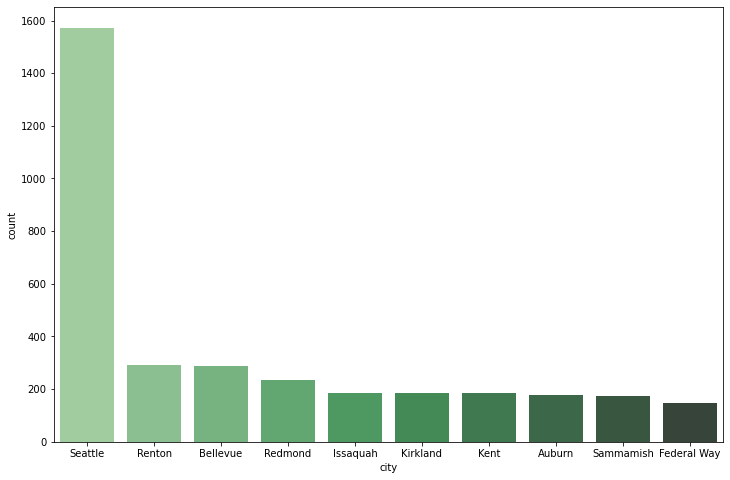

In [8]:
fig = plt.figure(figsize = (12, 8)) 
ax = sns.countplot(x="city", data=df, palette="Greens_d",
              order=df.city.value_counts().iloc[:10].index)

👉🏼 Parmis les biens présents dans la jeu de données <strong>34%</strong> sont situés à Seattle.

#### b- Années de construction

In [9]:
df['yr_built'] = np.where(df['yr_built'] <= 1950,
                            'Before 1950',
                            (np.where(np.logical_and(df['yr_built'] > 1950, df['yr_built'] <= 2000),
                                     'Between 1950 and 2000',
                                          (np.where(df['yr_built'] > 2000,
                                           'After 2000','false')))))

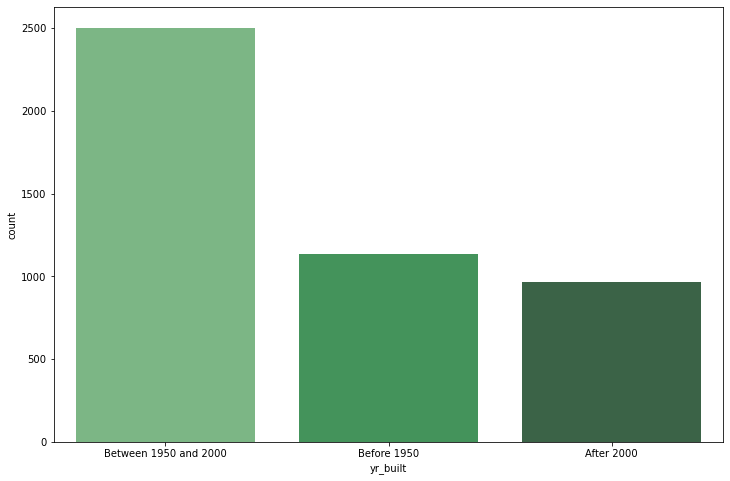

In [10]:
fig = plt.figure(figsize = (12, 8)) 
ax = sns.countplot(x="yr_built", data=df, palette="Greens_d")

👉🏼 Plus de <strong>54%</strong> sont ont été construits entre 1950 et 2000.

#### c- Surfaces habitables

In [11]:
from scipy import stats
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

In [12]:
df['sqft_living'].describe()

count     4600.000000
mean      2139.346957
std        963.206916
min        370.000000
25%       1460.000000
50%       1980.000000
75%       2620.000000
max      13540.000000
Name: sqft_living, dtype: float64

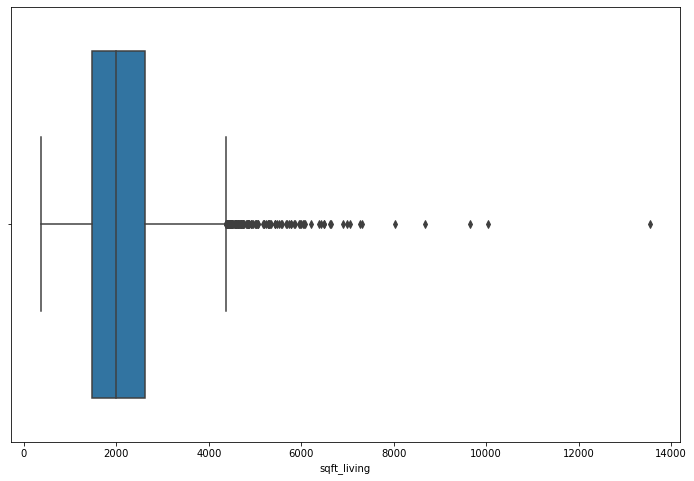

In [13]:
fig = plt.figure(figsize = (12, 8)) 
ax = sns.boxplot(x=df["sqft_living"])

sqft_living's: Skew: 1.722951204510254, : SkewtestResult(statistic=33.81465782140385, pvalue=1.2010222604540622e-250)


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


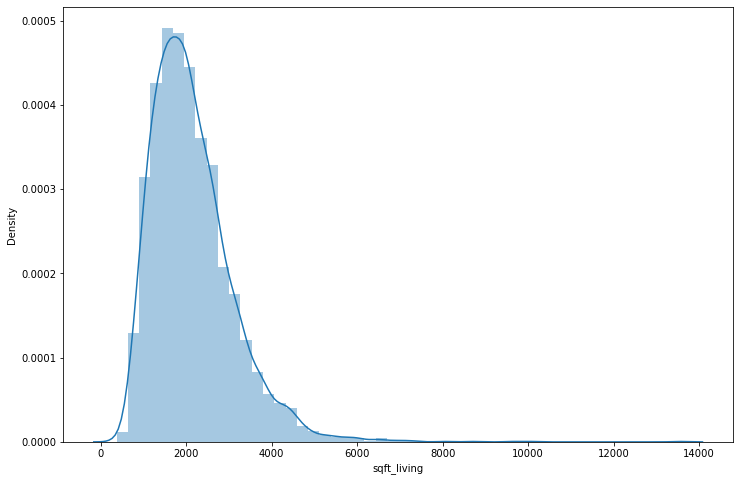

In [14]:
fig = plt.figure(figsize = (12, 8)) 
check_skew(df, 'sqft_living')

👉🏼 La surface habitable moyenne des 4600 biens est de <strong>2139</strong> square feets soit <strong>199 m2</strong>. Les surfaces habitables varient entre <strong>34</strong> et <strong>1257</strong> m2 avec un écart à la moyenne de <strong>89</strong> m2 avec 75% des biens qui ont une surface inférieure ou égale à <strong>243</strong> m2. Le boxplot démontre une asymétrie positive (confirmée par le coefficient de Skewness qui de 1,72) ainsi que la présence de valeurs abérantes (au dessus de <strong>371</strong> m2). Ces valeurs abérantes peuvent avoir un impact sur le prix, qui sera ici notre target, et in-fine sur notre modèle de machine learning. Il est donc nécessaire de réaliser le même travail sur les prix afin d'identifier les outliers et les corriger voire les supprimer. 

#### d- Prix

In [15]:
df[['price']].describe()

,price
count,4.600000e+03
mean,5.519630e+05
std,5.638347e+05
min,0.000000e+00
25%,3.228750e+05
50%,4.609435e+05
75%,6.549625e+05
max,2.659000e+07


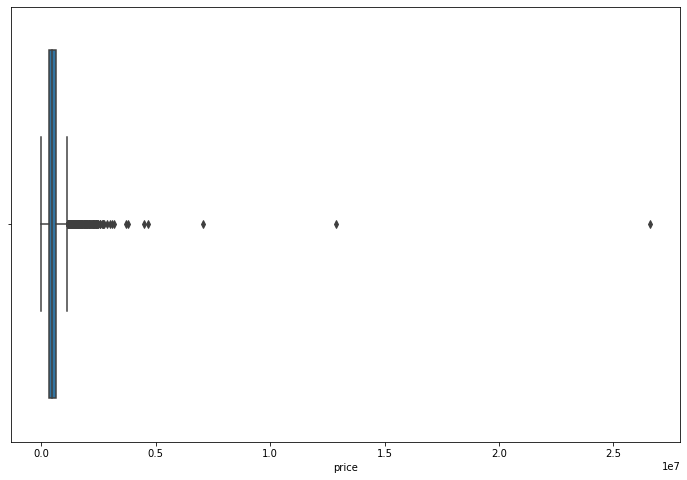

In [16]:
fig = plt.figure(figsize = (12, 8)) 
ax = sns.boxplot(x=df["price"])

price's: Skew: 24.78284782965085, : SkewtestResult(statistic=93.15700244010924, pvalue=0.0)


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


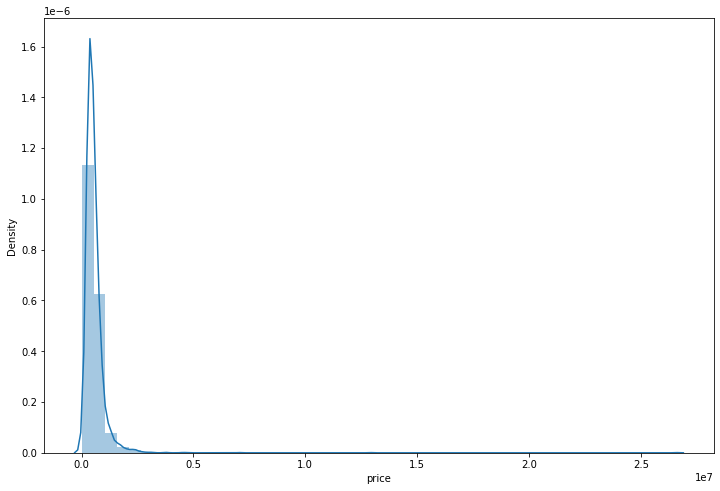

In [17]:
fig = plt.figure(figsize = (12, 8)) 
check_skew(df, 'price')

👉🏼 L'analyse de distribution des prix confirme le doute évoqué précédemment. La distribution est très asymétrique (<strong>Skew = 24,7</strong>. Il s'agirait donc de les identifier via à la méthode des <strong>Z-score</strong> et les remplacer voir les supprimer.

#### e- Nombre de chambres

In [18]:
df['bedrooms'].describe()

count    4600.000000
mean        3.400870
std         0.908848
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: bedrooms, dtype: float64

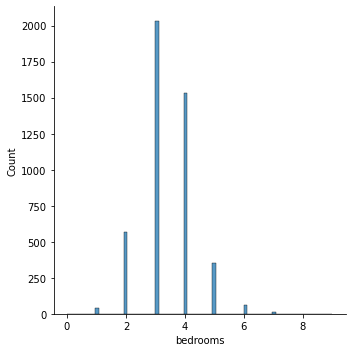

In [19]:
sns.displot(df, x="bedrooms")
#ax = sns.boxplot(x=df["bedrooms"])

👉🏼 Un grand nombre de biens disposent d'entre 2 et 5 chambres et d'en moyenne 3 chambres.

#### e- Nombre de toilletes

In [20]:
df['bathrooms'].describe()

count    4600.000000
mean        2.160815
std         0.783781
min         0.000000
25%         1.750000
50%         2.250000
75%         2.500000
max         8.000000
Name: bathrooms, dtype: float64

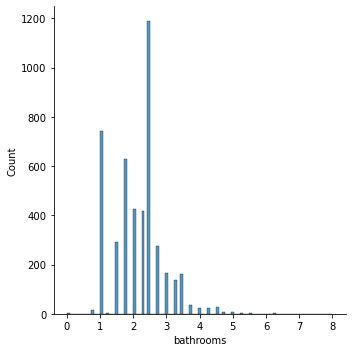

In [21]:
sns.displot(df, x="bathrooms")

👉🏼 Il serait peut-être plus pertinent d'arrondir le nombre de toilletes afin de raprocher les valeur.

#### f- Vue sur mer

In [22]:
df['waterfront'].unique()

array([0, 1])

👉🏼 La vue sur la mer en booléan : ✅

#### g- Rénovation

In [23]:
df['yr_renovated'].value_counts()

0       2735
2000     170
2003     151
2009     109
2001     109
2005      95
2004      77
2014      72
2006      68
2013      61
1923      57
1994      57
1989      55
2011      54
2012      45
2008      45
1988      43
1999      41
2002      41
1983      41
1998      40
1993      39
1912      33
1979      32
1992      32
2010      30
1985      29
1997      28
1996      22
1982      22
1972      17
1990      16
1956      15
1963      12
1969      11
1984      10
1970       9
1968       9
1954       8
1945       7
2007       7
1974       6
1934       6
1971       5
1958       5
1986       5
1978       3
1980       2
1995       2
1955       2
1977       1
1913       1
1991       1
1948       1
1966       1
1960       1
1987       1
1953       1
1981       1
1975       1
Name: yr_renovated, dtype: int64

In [24]:
x_simple = df['price']
y_simple = df['yr_renovated']
corr = np.corrcoef(x_simple, y_simple)

print(corr)

[[ 1.         -0.02877365]
 [-0.02877365  1.        ]]


👉🏼 Nous constatons que plus de la moitier des biens n'ont pas été rénovés portent le numéro 0 (= pas rénové) et que le reste des valeurs correspondent à l'année de rénovation du bien. Cela pourrait donc avoir une incidence sur la corrélation entre les prix et la rénovation du bien qui est presque nulle (<strong>-0,02</strong>. Il serait plus pertinent de transformer ces données en booléan [0 = non rénové, 1 = rénové].

## III - Feature engineering et Data Transformation

### 1- Ajout de nouvelles variables

Les prix des biens immobiliers ne dépendents pas toujours des qualités physiques de ces derniers mais aussi d'éléments extérieurs. Nous disposons dans notre jeu de données uniquement d'un seul élément externe qui est la vue. C'est la raison pour laquelle nous avons décider d'enrichir notre jeu avec des données externes liées à l'index de sécurité ainsi qu'à la médiane des prix de viente de biens situés dans les mêmes zones. C'est médianes permettent de catégoriser ces banlieus en <strong>"abordables"</strong>, <strong>"raisonable"</strong> et <strong>"chères"</strong>. L'indice de sécurité quant à lui varie entre <strong>A et F</strong> des zones qui connaissent le moins de crimes à celles qui en connaissent le plus. Ces données ont été récupérées des sites <strong>realtor.com</strong> et <strong>crimegrade.org</strong>.

In [25]:
df_expensive_safety = pd.read_csv('/Users/obelmouzouna/Downloads/medianprice_&_index_safety.csv', sep=';')
df_expensive_safety.head(3)

,suburbs,median sale price,is_expensive,safety
0,Skykomish,397000,affordable,D+
1,Algona,475000,affordable,B
2,Pacific,498000,affordable,C+


In [26]:
df = pd.merge(df,df_expensive_safety[['suburbs','is_expensive','safety']], 
              left_on = 'city'
              , right_on = 'suburbs'
              , how='left' )

In [27]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,suburbs,is_expensive,safety
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,0,Between 1950 and 2000,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,Shoreline,reasonable,B-
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,280,Before 1950,0,709 W Blaine St,Seattle,WA 98119,USA,Seattle,reasonable,D
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,Between 1950 and 2000,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,Kent,affordable,D-
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,1000,Between 1950 and 2000,0,857 170th Pl NE,Bellevue,WA 98008,USA,Bellevue,expensive,D-
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,800,Between 1950 and 2000,1992,9105 170th Ave NE,Redmond,WA 98052,USA,Redmond,reasonable,C-


### 2- Transformations

#### a- yr_renovated et waterfront

Nous avons décidé également de transformer les variables booléans <strong>yr_renovated</strong> et <strong>waterfront</strong>. Les 0 deviennent ainsi 'n' pour 'no' et les 1 deviennent des 'y' pour 'yes'. Nous avons également renommé la variable yr_renovated en <strong>renovated</strong>.

In [28]:
df['yr_renovated'] = np.where(df['yr_renovated'] == 0,
                            'n',
                            (np.where(df['yr_renovated'] > 0,
                                           'y','false')))
df['waterfront'] = np.where(df['waterfront'] == 0,
                            'n',
                            (np.where(df['waterfront'] == 1,
                                           'y','false')))
df = df.rename(columns={"yr_renovated": "renovated"})
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,renovated,street,city,statezip,country,suburbs,is_expensive,safety
0,2014-05-02,313000.0,3.0,1.5,1340,7912,1.5,n,0,3,...,0,Between 1950 and 2000,y,18810 Densmore Ave N,Shoreline,WA 98133,USA,Shoreline,reasonable,B-
1,2014-05-02,2384000.0,5.0,2.5,3650,9050,2.0,n,4,5,...,280,Before 1950,n,709 W Blaine St,Seattle,WA 98119,USA,Seattle,reasonable,D
2,2014-05-02,342000.0,3.0,2.0,1930,11947,1.0,n,0,4,...,0,Between 1950 and 2000,n,26206-26214 143rd Ave SE,Kent,WA 98042,USA,Kent,affordable,D-


#### b- transformation des variables catégorielles ordinales

Disposant désormais de toutes nos variables catégorielles, nous allons procéder à la transformation en variables binaires pour alimenter notre modèle de machine learning. Pour celà, nous utilisons la fonction <strong>get_dummies</strong>.

In [29]:
df = pd.get_dummies(df, columns=['yr_built','waterfront','renovated','is_expensive','safety'], drop_first=True)

#### c- détection des valeurs aberrantes (Outliers)

L'analyse préliminaire a démontré la présence de valeurs aberrantes dans notre jeu de données, des valeurs que nous allons devoir détecter, isoler puis supprimer. Nous avons décider d'utiliser la méthode <strong>z-score</strong> qui consiste a calculé le nombre d'écarts-types dans notre observation. Les valeurs non aberrantes se retrouverons donc <strong>comprisent entre -3 et 3</strong> et les Outliers se retrouverons en dehors de cet intervalle.

In [30]:
df['z-score'] = (df.price - df.price.mean())/df.price.std()

In [31]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,...,safety_B+,safety_B-,safety_C,safety_C+,safety_C-,safety_D,safety_D+,safety_D-,safety_F,z-score
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,3,1340,...,0,1,0,0,0,0,0,0,0,-0.423817
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,4,5,3370,...,0,0,0,0,0,1,0,0,0,3.249245
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,4,1930,...,0,0,0,0,0,0,0,1,0,-0.372384
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,...,0,0,0,0,0,0,0,1,0,-0.234046
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,4,1140,...,0,0,0,0,1,0,0,0,0,-0.003481


In [32]:
df[df['z-score'] > 3]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,...,safety_B+,safety_B-,safety_C,safety_C+,safety_C-,safety_D,safety_D+,safety_D-,safety_F,z-score
1,2014-05-02,2.384000e+06,5.0,2.50,3650,9050,2.0,4,5,3370,...,0,0,0,0,0,1,0,0,0,3.249245
122,2014-05-05,2.280000e+06,7.0,8.00,13540,307752,3.0,4,3,9410,...,0,0,0,0,1,0,0,0,0,3.064794
252,2014-05-07,3.200000e+06,7.0,4.50,6210,8856,2.5,2,5,4760,...,0,0,0,0,0,1,0,0,0,4.696478
404,2014-05-09,2.400000e+06,3.0,2.25,3000,11665,1.5,4,3,3000,...,0,0,0,0,0,0,0,0,0,3.277622
581,2014-05-13,2.555000e+06,4.0,2.50,5300,26211,2.0,2,2,4570,...,0,0,0,0,0,1,0,0,0,3.552525
1132,2014-05-21,2.700000e+06,5.0,4.75,5305,8401,2.0,2,3,3745,...,0,0,1,0,0,0,0,0,0,3.809693
1543,2014-05-29,2.453500e+06,4.0,3.50,4730,13586,1.5,0,5,4270,...,0,0,0,0,0,1,0,0,0,3.372508
1567,2014-05-29,3.100000e+06,6.0,4.25,6980,15682,3.0,4,4,5330,...,0,0,0,1,0,0,0,0,0,4.519121
1571,2014-05-29,2.750000e+06,4.0,3.25,4430,21000,2.0,0,3,4430,...,0,0,0,0,1,0,0,0,0,3.898371
1600,2014-05-30,2.400000e+06,4.0,3.25,4140,20734,1.0,1,3,3300,...,0,0,0,1,0,0,0,0,0,3.277622


In [33]:
df[df['z-score'] < -3]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,...,safety_B+,safety_B-,safety_C,safety_C+,safety_C-,safety_D,safety_D+,safety_D-,safety_F,z-score


Nos Outliers étant détectés, nous procédons à leur suppression.

In [34]:
df = df[df['z-score'] < 3]

Malgré cette suppression <strong>certaines valeurs aberrantes persistent</strong>. Il s'agit ici des biens affichant des prix de vente de 0. Il s'agirait probablement de biens donnés ou hérités. Nous allons donc les retirés car elles peuvent impacter les performance de notre modèle. Nous inclurons également dans cette suppression le bien vendu à <strong>7800 $</strong> car le prix nous paraît suspect. Celà entrainera la perte de <strong>50 biens en plus</strong>.

In [35]:
df.groupby('price')['bedrooms'].count()

price
0.0          49
7800.0        1
80000.0       1
83000.0       1
83300.0       2
             ..
2150000.0     1
2180000.0     1
2199900.0     1
2200000.0     1
2238888.0     1
Name: bedrooms, Length: 1712, dtype: int64

In [36]:
df = df.query("~(price < 8000)")

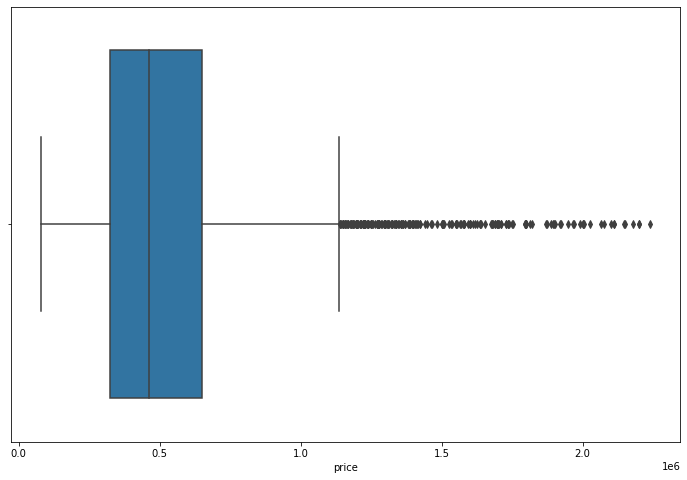

In [37]:
fig = plt.figure(figsize = (12, 8)) 
ax = sns.boxplot(x=df["price"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


price's: Skew: 1.8534241289517108, : SkewtestResult(statistic=34.998790752312196, pvalue=2.347165132407996e-268)


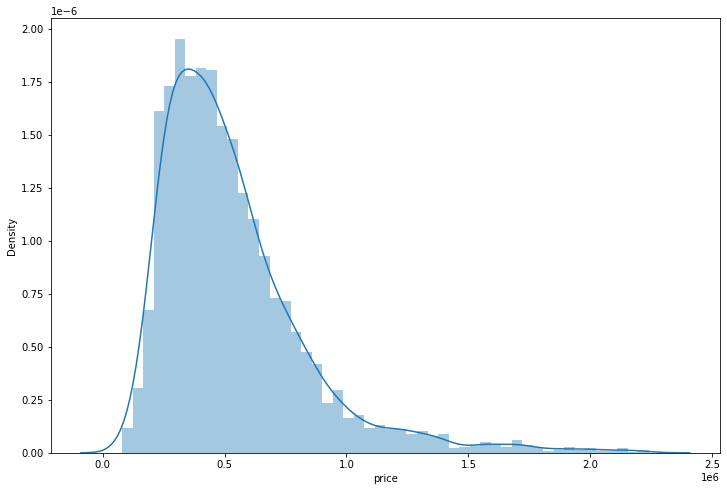

In [38]:
fig = plt.figure(figsize = (12, 8)) 
check_skew(df, 'price')

La distribution des prix est désormais moins asymétrique et nous sommes passés d'un coefficient d'asymétrie de <strong>24,7</strong> à <strong>1,8</strong>. Rappelons que qu'un coefficient d'asymétrie acceptable se situe entre <strong>-3</strong> et <strong>3</strong>.

## IV - Corrélogramme

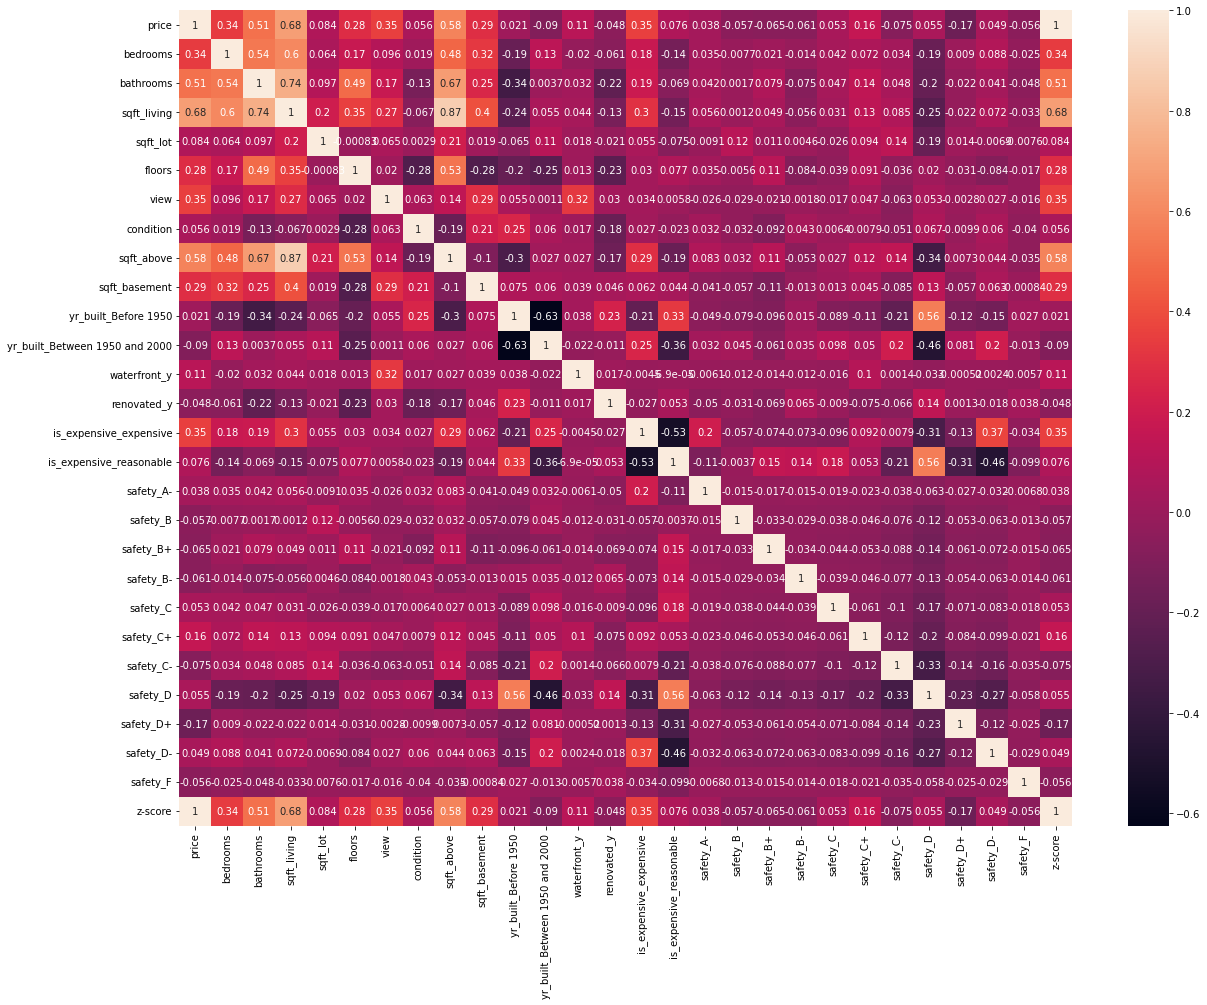

In [39]:
fig = plt.figure(figsize = (20,15)) 
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Notre target est très corrélé avec la variables ***sqft_living*** et est modérément corrélé aux variables ***bathrooms*** et ***sqft_above***. La corrélation avec les autres variables reste plus ou moins faibles.

## 3 - Split du Df

On note que les champs **street**, **city**, **statezip**, **country**, **suburbs** et **date** sont des variables catégorielles, elles ne sont donc pas acceptées dans le modèle ML.

In [40]:
y = df[['price']]
x = df.drop(['date','price','street','statezip','country','city','suburbs','z-score','yr_built_Between 1950 and 2000','floors','safety_A-','safety_B+'], axis = 1)

In [41]:
y.head()

,price
0,313000.0
2,342000.0
3,420000.0
4,550000.0
5,490000.0


In [42]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,sqft_above,sqft_basement,yr_built_Before 1950,waterfront_y,...,is_expensive_reasonable,safety_B,safety_B-,safety_C,safety_C+,safety_C-,safety_D,safety_D+,safety_D-,safety_F
0,3.0,1.50,1340,7912,0,3,1340,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,3.0,2.00,1930,11947,0,4,1930,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3.0,2.25,2000,8030,0,4,1000,1000,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.0,2.50,1940,10500,0,4,1140,800,0,0,...,1,0,0,0,0,1,0,0,0,0
5,2.0,1.00,880,6380,0,3,880,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [44]:
x_train.shape

(3612, 22)

L'échantillon faisant bien plus de <strong>10 fois</strong> le nombre de variables, nous pouvons appliquer notre modèle.

In [45]:
x_test.shape

(904, 22)

## 4 - Régression Linéaire Multiple

In [46]:
x_train=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)
reg1 = sm.OLS(y_train, x_train)
results = reg1.fit()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [47]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     356.8
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        23:27:01   Log-Likelihood:                -48734.
No. Observations:                3612   AIC:                         9.751e+04
Df Residuals:                    3590   BIC:                         9.765e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3

👉🏼Remarques :

- Les variables explicatives ont des p-values inférieures à 5% à l'exception de ***'yr_built_Between 1950 and 2000','floors','safety_A-' et 'safety_B+'*** que nous avons retirer avant de relancer notre modèles 


- Le R-squared étant de 0,67 nous pouvons le considéré comme satisfaisant. Ainsi, 67,6% des variations de la valeur d’une maison sont expliquées par les variations de valeurs explicatives


- Le test Drubin-Watson (< à 2)indique une autocorrélation positive

In [49]:
y_pred=results.predict(x_test)

In [50]:
rmse = mean_squared_error(y_pred,y_test)**(1/2) # calculer l'erreur
rmse

173475.53178358576